---

<p align="center">
  <img src="https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/images/imagen_ucentral.jpg" alt="logo_Ucentral" width="400px" height="300px">
</p>


# ___Diplomado: Métodos Estadísticos para el Análisis de Datos___

## ___Docente: Luis Andres Campos Maldonado.___

### ___Variables Aleatorias-Funciones de Probabilidad.___


##### ***Distribuciones de probabilidad.***

Vamos a considerar algunas distribuciones que serán de uso en lo que resta del curso.

- Distribución Binomial.
- Distribución Normal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, norm

sns.set_style("darkgrid")

## ***Distribuciones.***

Vamos a considerar algunas distribuciones que serán de uso en lo que resta del curso.

- Distribución Binomial.
- Distribución Normal.

### ***Distribución de Bernoulli.***


Una variable de Bernoulli se da cuando en un experimento aleatorio tenemos solo dos resultados posibles: 

- $E$ evento llamado : **éxito**

- $E^c$ evento llamado : **fracaso**

En este caso, si $P(E)=p$ entonces $P(E^c)=1-p$

Una Variable Aleatoria definida así:

$$\begin{align*} X \,  :& \, \Omega \longrightarrow \mathbb{R} \\ & \omega \longrightarrow X(\omega)= \begin{cases} 1 & si \quad \omega=E \\ 0 & si \quad \omega=E^c  \end{cases} \end{align*}$$
se le llama *variable aleatoria de Bernoulli* de parámetro $p$: $X \sim B(p)$

Además, la función de densidad está dada por :

$$f(x)= \begin{cases} 1-p & si \quad x=0 \\ p & si \quad x=1 \\ 0 & \text{en otro caso}  \end{cases} = \begin{cases} p^x(1-p)^{1-x} & si \quad x=0,1 \\ 0 & \text{en otro caso} \end{cases}$$
y la distribución de probabilidad

$$F(x)= \begin{cases} 0 & si \quad x<0 \\ 1-p & si \quad 0 \leq x < 1 \\ 1 & si \quad x \geq 1  \end{cases}$$
El valor esperado o la esperanza de la variable aleatoria está dado por:

$$\begin{align*} E(X) & =\sum \limits_{x} xf(x) \\ & = 0.(1-p)+1.p \\ & =  p \end{align*}$$ 
Por otro lado,la varianza 

$$\begin{align*} Var(X) & =E(X^2)-E(X)^2 \\ & = \sum \limits_{x} x^2f(x) - p^2 \\& =  0^2(1-p)+1^2(p)-p^2 \\ & =p-p^2 \\ & = p(1-p) \end{align*}$$



#### ***Ejemplo 1.***

Vamos a simular una variable aleatoria de Bernoulli, haciendo uso de `Python` con la instrucción *bernoulli.rvs(p,N)*, donde $p$ es la probabilidad de éxito y N es el número de simulaciones del experimento.

In [2]:
## Simulamos 10 eventos bernoullis de parámetro p = 0.3
bernoulli.rvs(0.3, size = 10, random_state = 1)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
x = bernoulli.rvs(0.3, size = 100000, random_state=1)
grap = np.unique(x, return_counts = True)
grap

(array([0, 1]), array([70050, 29950]))

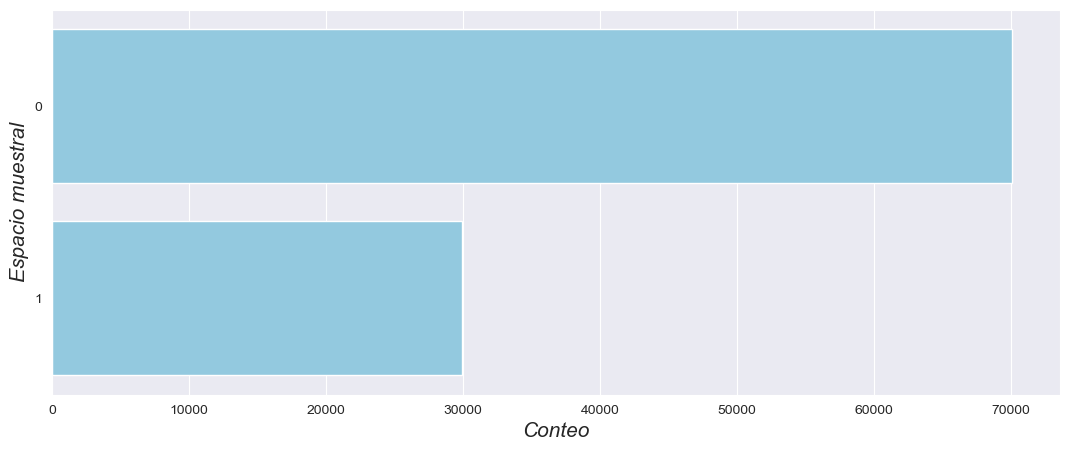

In [4]:
x = pd.DataFrame(x, columns = ["simulacion"])
plt.figure(figsize=(13,5))
sns.countplot(data =x , y = "simulacion", color = "skyblue")
plt.xlabel("Conteo", size = 15, style="italic")
plt.ylabel("Espacio muestral", size = 15, style="italic")
plt.show()

Note que en la situación anterior se espera que al realizar múltiples veces el experimento el total de éxitos es del 30% aproximadamente. Recuerde que el valor esperado es 0.3 y la varianza es 0.21.

#### ***Ejemplo 2 (Bernoulli).***

Al lanzar una moneda los dos eventos posibles son cara y sello. Si asignamos los valores de $1$ y $0$ obtenemos una variable aleatoria que se distribuye Bernoulli. 

```python
## Función de probabilidad
omega = ["cara", "sello"]
probas = bernoulli.pmf([0,1], p = 0.5)
for i,j in zip(omega,probas):
    print("La probabilidad de", i, "es:", j)
```



In [5]:
# Celda para probar.
## Función de probabilidad
omega = ["cara", "sello"]
probas = bernoulli.pmf([0,1], p = 0.5)
for i,j in zip(omega,probas):
    print("La probabilidad de", i, "es:", j)

La probabilidad de cara es: 0.5
La probabilidad de sello es: 0.5


#### ***Ejemplo 3 (Bernoulli).***

En un lote de $400$ piñones se selecciona un piñon al azar, determinaremos si está defectuoso o no. Si sabemos que en el lote hay $100$ piñones  defectuosos y $E$ = "el piñon extraído es defectuso", entonces

$$P(E)=\dfrac{100}{400}=\dfrac{1}{4}$$

Esto nos permite definir una variable aleatoria con $X(E)=1$ y $X(E^c)=0$. Además, 

- $P(X=1)=p=\dfrac{1}{4}$
- $P(X=0)=\dfrac{300}{400}=\dfrac{3}{4}$

En este caso, $X \sim B(1/4)$

## ***Distribución Binomial.***


La distribución binomial se obtiene a partir de la realización de $n$ experimentos de Bernoulli de manera sucesiva, teniendo en cuenta que cada evento es independiente del anterior.

Definimos la variable aleatoria

$X$= número de éxitos en las $n$ pruebas. 

Si consideramos que $p$ es la probabilidad de éxito, entonces se dice que $X$ se distribuye Binomial con parámetros $n$ y $p$, y se denota

$$X \sim B(n,p)$$

La variable $X$ puede tomar los valores $0,1,2, \dots, n$. Además, la probabilidad se calcula de la siguiente manera:

- Probabilidad que en $n$ intentos de un experimento aletario, no se obtenga "éxito"

$$P(X=0)=(1-p)^{n}$$ 

es decir, todos son intentos son fracasos.

- Probabilidad que en $n$ intentos de un experimento aletario, se obtenga una vez "éxito"

$$P(X=1)= \binom{n}{1}p(1-p)^{n-1} $$
En general

$$P(X=k)= \binom{n}{k}p^{k}(1-p)^{n-k} $$
La distribución Binomial se da en ciertas características:

- En cada ensayo o experimento solo hay dos posibles resultados: éxito o fracaso.

- La probabilidad de éxito es constante. 

- El resultado de cada experimento es independiente del anterior.

- Los sucesos son mutuamente excluyentes.

Además, usando la definición, es posible deducir lo siguiente

- $E[X]=np$

- $Var[X]=np(1-p)$

***Veamos un par de ejemplos:***

#### ***Ejemplo 1 (Binomial).***

Supongamos que el $70 \%$ de personas de una ciudad ha visto la final de fútbol de los equipos de la región. En una reunión, cinco personas comparten experiencias. ¿Cuál es la probabilidad de que 3 de ellos hayan visto el partido de Fúlbol?

**Solución:** Dado el problema tenemos los siguientes datos:

- $n=5$

- $X$ = "Número de éxitos."

- $p=0.7$: probabilidad de éxito, es decir, de que una persona haya visto el partido.

- Nos preguntan : $P(X=3)$

$$P(X=3)= \binom{5}{3}(0.7)^{3}(0.3)^{2}$$

Antes de calcular la probabilidad, simulemos el experimento:

In [6]:
## binom.rvs(n,p,size); n = parámetro binomial, p = proba de éxito, 
## size = tamaño muestra aleatoria.
for random in range(5):
  print("Simulación",random +1,": ",binom.rvs(5, p = 0.7, random_state = random , size = 10))

Simulación 1 :  [3 3 3 3 4 3 4 2 2 4]
Simulación 2 :  [4 3 5 4 5 5 4 4 4 3]
Simulación 3 :  [4 5 3 4 4 4 4 3 4 4]
Simulación 4 :  [3 3 4 4 2 2 5 4 5 4]
Simulación 5 :  [2 3 1 3 3 4 1 5 4 4]


Para calcular este valor en `Python`, usamos la instrucción `binom.pmf(k,n,p)`, donde $k$ es el valor que toma la variable aleatoria, $n$ es el número de ensayos independientes y $p$ es la probabilidad de éxito de cada ensayo.

In [7]:
p = binom.pmf(3,5,0.7)
print("La probabilidad de que 3 de ellos hayan visto el partido de fútbol es:", round(p,4))

La probabilidad de que 3 de ellos hayan visto el partido de fútbol es: 0.3087


In [8]:
## Todas las probabilidad para este caso.
binom.pmf([i for i in range(6)],5,0.7)

array([0.00243, 0.02835, 0.1323 , 0.3087 , 0.36015, 0.16807])

In [9]:
binom.pmf([1,4,5], 5, 0.7) ## P(X=1), P(X=4), P(X=5)

array([0.02835, 0.36015, 0.16807])

In [10]:
sum(binom.pmf([i for i in range(6)], 5, 0.7)) ## # La suma de las probabilidades debe ser 1

0.9999999999999998

Para calcular probabilidades binomiales *acumuladas* en `Python` , usamos el comando *binom.cdf(x,n,p)*

$$binom.cdf(x,n,p)=P(X \leq x)=P(X=0)+P(X=1)+\dots + P(X=x)$$

In [11]:
# P(X=0)+P(X=1)+P(X=2) = P(X <= 2); pbinom: Función de distribución acumulada
binom.cdf(2, 5, 0.7)

0.16308000000000006

In [12]:
# P(X>2)=1-P(X <=2)
binom.sf(2,5,0.7)

0.8369199999999999

In [13]:
binom.pmf([3,4,5],5,0.7)

array([0.3087 , 0.36015, 0.16807])

In [14]:
# P(X=3)+P(X=4)+P(X=5)
print(sum(binom.pmf([3,4,5],5,0.7)))
np.sum(binom.pmf([3,4,5],5,0.7))

0.8369199999999998


0.8369199999999998

In [15]:
# P(X > 1)=P(X >= 2)
binom.sf(1,5,0.7)

0.96922

### ***Veamos algunas representaciones (histogramas de la variable)***

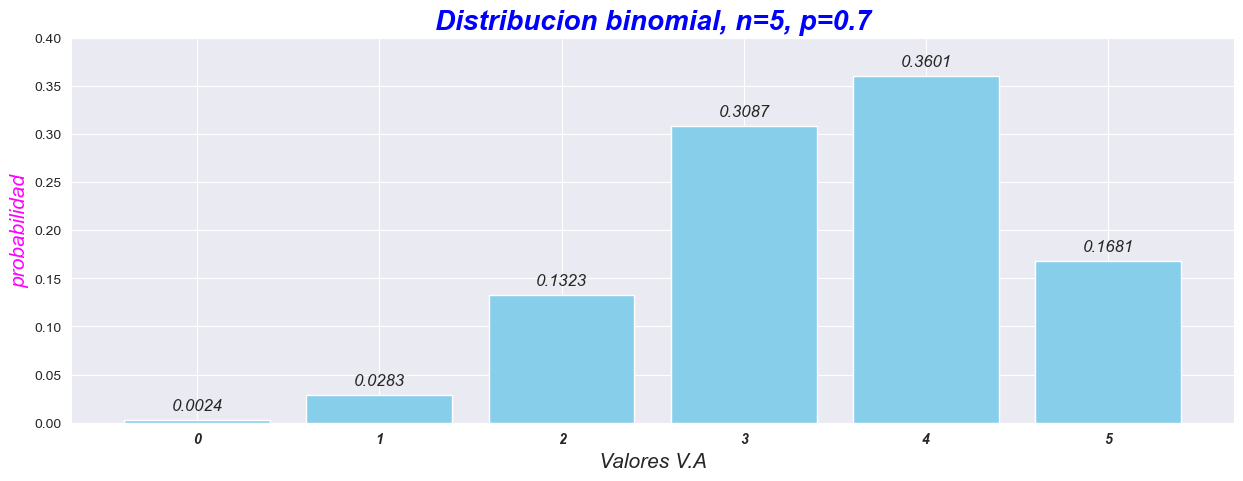

In [16]:
probas = binom.pmf(range(6), 5, 0.7)
##
plt.figure(figsize = (15,5))
plt.bar(x = range(6), height = probas, color = "skyblue")
plt.xlabel("Valores V.A", size = 15, style = "italic")
plt.ylabel("probabilidad", size = 15, style = "italic", color = "magenta")
plt.title("Distribucion binomial, n=5, p=0.7", size = 20, fontstyle = "oblique", 
          color = "blue", fontweight = "bold")
plt.xticks([0,1,2,3,4,5], labels=["0", "1", "2","3", "4","5"], 
           fontstyle="italic", fontweight = "bold")
plt.ylim(0,0.4)
for i, text in enumerate(probas):
    plt.text(i, text + 0.01,round(text,4), horizontalalignment='center', fontsize = 12, 
             fontstyle = "italic")
plt.show()

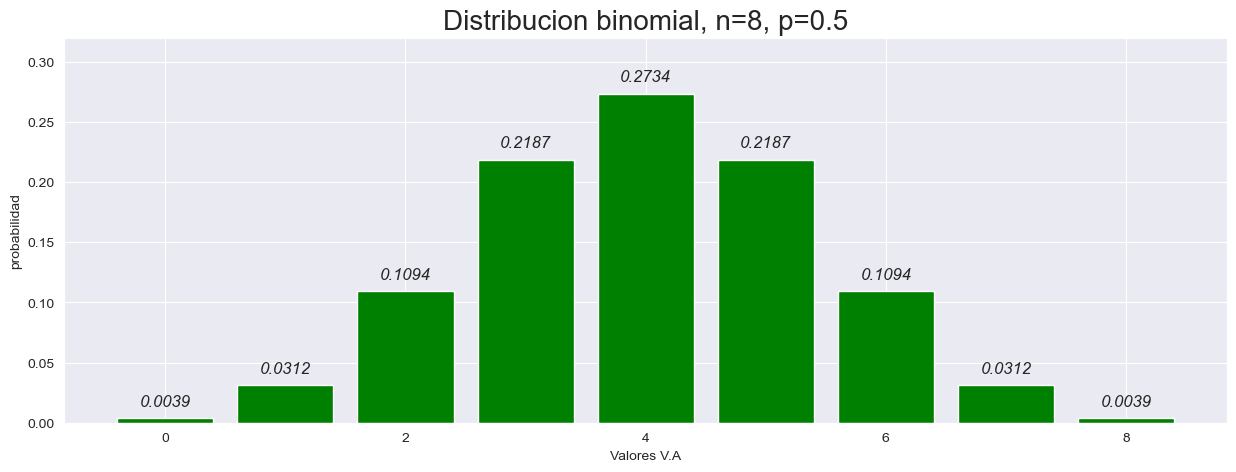

In [17]:
probas = binom.pmf(range(9), 8, 0.5)
##
plt.figure(figsize = (15,5))
plt.bar(x = range(9), height = probas, color = "green")
plt.xlabel("Valores V.A")
plt.ylabel("probabilidad")
plt.ylim(0,0.32)
plt.title("Distribucion binomial, n=8, p=0.5", size = 20)
##
for i, text in enumerate(probas):
    plt.text(i, text + 0.01,round(text,4), horizontalalignment='center', fontsize = 12, 
             fontstyle = "italic")
plt.show()

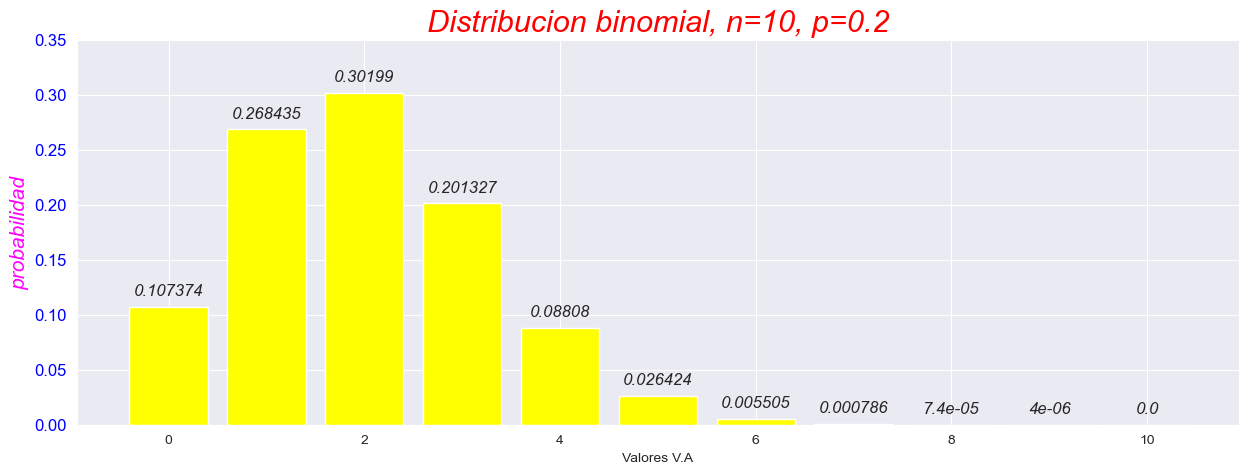

In [18]:
probas = binom.pmf(range(11), 10, 0.2)
##
plt.figure(figsize = (15,5))
plt.bar(x = range(11), height = probas, color = "yellow")
plt.xlabel("Valores V.A")
plt.ylabel("probabilidad", color = "magenta", fontsize = 15, fontstyle = "italic")
plt.yticks(color = "blue", fontsize = 12)
plt.ylim(0,0.35)
plt.title("Distribucion binomial, n=10, p=0.2", size = 22, color = "red", fontstyle = "italic" )
##
for i, text in enumerate(probas):
    plt.text(i, text + 0.01,round(text,6), horizontalalignment='center', fontsize = 12, 
             fontstyle = "italic")
plt.show()

***¿Donde se presenta la probabilidad más alta?***

### ***Ejemplo 2 (Binomial).***

Se acusa a una persona de un crimen y se lleva a un juicio con un jurado de 15 personas. Para ser condenado se requien que al menos 10 personas del jurado voten culpable. Cada jurado dejará su voto al azar y lo determinará con el lanzamiento de una moneda. Si cae cara es culpable y cae sello es inocente. ¿Cuál es la probabilidad de que el acusado sea declarado culpable?

**Solución:** Definimos el evento $A$: obtener sello en el lanzamiento o de otra manera "inocente". Es decir,  $p(A)=0.5$ en un intento.

- $X$ será el numéro de éxitos, (obtener sello) en $15$ intentos.

Para que el acusado salga inocente debe obtener por lo menos $10$ veces sellos, es decir: $X \geq 10$.

Luego,

$$P(X \geq 10)= \sum \limits_{k=
10}^{15} \binom{15}{k} \left (\dfrac{1}{2} \right )^k \left( \dfrac{1}{2} \right)^{15-k}$$

In [19]:
p = binom.sf(9,15,0.5)
print("La probabilidad de que el acusado salga inocente es:", round(p,5))

La probabilidad de que el acusado salga inocente es: 0.15088


## ***Distribución Normal.***


La distribución normal o distribución Gaussiana es una de las más importantes distribuciones continuas, ya que muchos fenómenos se pueden modelar por medio de una distribución normal. Esta distribución tiene dos parámetros fundamentales:

- $\mu$: media de la distribución. Este puede ser cualquier valor real.

- $\sigma$: desviación típica o estándar de la distribución. ($\sigma^2$: varianza). Valor real estrictamente mayor que 0.

Cuando una variable sigue una distribución normal se denota $X \sim N(\mu, \sigma^2)$

La ecuación que describe la distribución normal (forma de campana de Gauss) viene dada por la siguiente función.

$$f(x)=\dfrac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Para trabajar en `Python` usamos la instrucción 

1. $pdf(x, loc=0, scale=1)$ : valor puntual de la función $f(x)$. Sin embargo, recordemos que en términos de la probabilidad este valor es cero.
4. $cdf(x, loc=0, scale=1)$ : probabilidad acumulada hasta $x$
5. $rvs(loc=0, scale=1,size=1, \text{random_state}=None)$ : valores aleatorios en una distribución normal.
6. $ppf(q, loc=0, scale=1)$ : cuantil $q$

**Observación:** Cuando $\mu=0$ y $\sigma=1$ la distribución $X \sim N(0,1)$ se denomina Normal estándar o tipificada.

<font color = "blue" FONT SIZE = 5>***Teorema:***</font>

Si $X \sim N(\mu, \sigma^2)$ entonces $\frac{X-\mu}{\sigma} \sim N(0,1)$

In [20]:
# mu = 3, sigma = 1, imagen de 2 vía la función de densidad.
norm.pdf(2,3,1)

0.24197072451914337

In [21]:
# P(X<=2), X es normal de media 3 y desviación estandar 1.
norm.cdf(2,3,1)

0.15865525393145707

In [22]:
# Simulamos 30 valor de una normal, media 3 y desviación estardar 1.
norm.rvs(3,1,20)

array([2.59304431, 4.01005914, 2.44953296, 2.59321712, 0.91699536,
       1.32151116, 4.56677272, 3.97864023, 3.05421427, 2.15443474,
       1.7918392 , 1.63606898, 3.40077905, 1.91090289, 2.41691321,
       2.56592663, 3.14981492, 4.11873869, 4.21305843, 3.73272645])

In [23]:
norm.ppf(0.95,0,1)

1.6448536269514722

In [24]:
norm.ppf(0.95)

1.6448536269514722

In [25]:
norm.ppf(0.0001), norm.ppf(0.9999)

(-3.7190164854556804, 3.719016485455709)

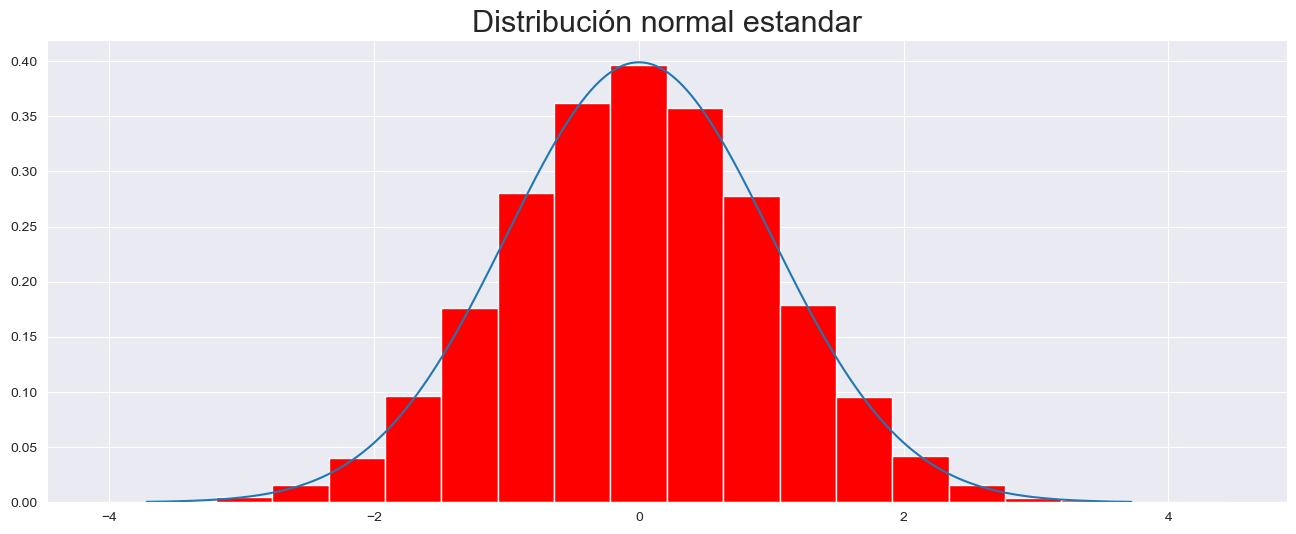

In [26]:
r = norm.rvs(size=100000)
x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 10000)

plt.figure(figsize=(16,6))
plt.plot(x, norm.pdf(x))
plt.hist(r, density = True, color = "red", bins = 20)
plt.title("Distribución normal estandar", size = 22)
plt.show()

#### ***Ejemplo 1 (Normal):***


En unos estudios realizados a un determinado tipo de aves rapaces. Se comprueba que la longitud de las alas extendidas, $X$, es una variable aleatoria que se distribuye aproximadamente según una curva Normal, de media 110 cms. y desviación típica 4 cms. Elegida un ave al azar y suponiendo que las longitudes se distribuyen normalmente, calcular:

a) La probabilidad de que la longitud de las alas esté comprendida entre 110 y 115 cm.

b) La probabilidad de que la longitud de las alas sea mayor que 105 cm.

c) La probabilidad de que la longitud de las alas sea menor de 100 cm.

d) La longitud mínima  del 20% de las alas que más miden

**Solución:**

Primero simulemos 20 elementos de esa variable aleatoria:



In [27]:
norm.rvs(110,4,20, random_state = 100)

array([103.00093811, 111.37072161, 114.61214321, 108.99025585,
       113.92528315, 112.05687537, 110.88471868, 105.71982668,
       109.24201668, 111.02000578, 108.16789206, 111.74065395,
       107.6656198 , 113.26738829, 112.69088322, 109.58235543,
       107.87487849, 114.11893074, 108.24745751, 105.52672701])

Además el histograma de la múltiples simulaciones:

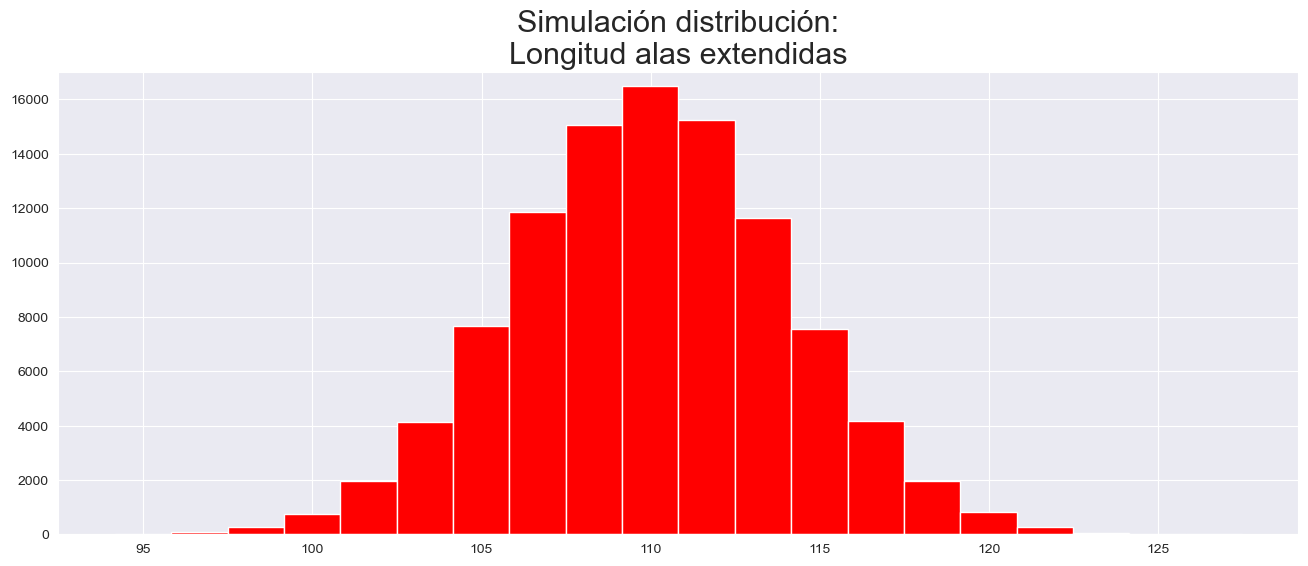

In [28]:
r = norm.rvs(110,4,100000, random_state = 2)
##
plt.figure(figsize=(16,6))
plt.hist(r, color = "red", bins = 20)
plt.title("Simulación distribución:\nLongitud alas extendidas", size = 22)
plt.ylim(0,17000)
plt.show()

a) $P(110 \leq X \leq 115)=P(X \leq 115)- P(X \leq 110)$

In [29]:
norm.cdf(115,110,4)-norm.cdf(110,110,4)

0.39435022633314465

In [30]:
media = 110
desviacion = 4
##
liminf = (110-media)/desviacion
limsup = (115-media)/desviacion
print(liminf)
print(limsup)

0.0
1.25


a) $P(110 \leq X \leq 115)=P(Z \leq 1.25)- P(Z \leq 0)$, donde $Z\sim N(0,1)$

In [31]:
norm.cdf(1.25)-norm.cdf(0) # Estandarización

0.39435022633314465

b) $P(X \geq 105)$

In [32]:
norm.sf(105,110,4)

0.8943502263331446

c) $P(X \leq 100)$

In [33]:
norm.cdf(100,110,4)

0.006209665325776132

d) La longitud mínima del $20\%$ de las alas que más miden 

Ordenamos los valores de menor a mayor, buscamos el $20\%$ de los valores más grandes de la variable. El valor mínimo de estos valores deja a la izquierda el $80\%$ de los valores de mediciones de las alas.
Es decir, debemos calcular el percentil $80$.

In [34]:
norm.ppf(0.8,110,4)

113.36648493429166

In [35]:
## Otra opción: El 20% de mayores valores.
norm.isf(0.2,110,4)

113.36648493429166

#### ***Ejercicio para casa:***

En enero de 2003 un empleado estadounidense pasaba, en promedio, 77 horas conectado a Internet durante las horas de trabajo (CNBC, 15 de marzo de 2003). Suponga que la media poblacional es 77 horas, tiempos que están distribuidos normalmente y que la desviación estándar es 20 horas. 

a) ¿Cuál es la probabilidad de que en enero de 2003 un empleado seleccionado aleatoriamente haya pasado menos de 50 horas conectado a Internet?

b) ¿Qué porcentaje de los empleados pasó en enero de 2003 más de 100
horas conectado a Internet?

c) Un usuario es clasificado como intensivo si se encuentra en el 20%
superior de uso. ¿Cuántas horas tiene un empleado que haber estado
conectado a Internet en enero de 2003 para que se le conside un
usuario intensivo?

#### ***Ejercicio para casa:***

Revisar y desglosar: http://jse.amstat.org/v11n2/datasets.heinz.html

## ***Resultados relacionados con la distribución Normal.***


Supongamos que tenemos $n$ variables aleatorias, $X_1$, $X_2, \dots, X_n$   que se distribuyen normal $X_i \sim N(\mu_i, \sigma_i^2)$, $i=1,2,3, \dots, n$. Entonces:
$$Y=X_1+X_2+ \dots + X_n$$

se distribuye normal y además

$$Y \sim N\left(\mu_1+\mu_2+\dots+\mu_n, \sigma_1^2+\sigma_2^2+\dots+\sigma_n^2 \right)$$

#### ***Ejemplo:***

Supongamos que:

- Promedio de la estatura de hombres latinos es $170$ cms con una desviación estándar de $5.8$ cms.

- Promedio de la estatura de hombres europeos es $178$ cms con una desviación estándar de $6.2$ cms.

- Promedio de la estatura de mujeres latinas es $164$ cms con una desviación estandar de $7.2$ cms.

Vamos a escoger una muestra de 4 personas; un hombre latino, europeo y dos mujeres.

In [36]:
x1 = norm.rvs(170, 5.8,1,  random_state = 1) 
x2 = norm.rvs(178, 6.2,1,  random_state = 1)
x3 = norm.rvs(164, 7.2, 1, random_state = 1)
x4 = norm.rvs(164, 7.2, 1, random_state = 2) 
y=x1+x2+x3+x4 
pd.DataFrame({"x1":x1,"x2":x2, "x3":x3,"x4":x4,"y":y},
             index = ["simulacion"])

,x1,x2,x3,x4,y
simulacion,179.421203,188.070941,175.695287,160.999343,704.186774


Si hacemos este proceso $20000$ veces los valores de $y$ debería aproximarse a una variable normal. Para esto vamos a usar una estructura de control con un *for*

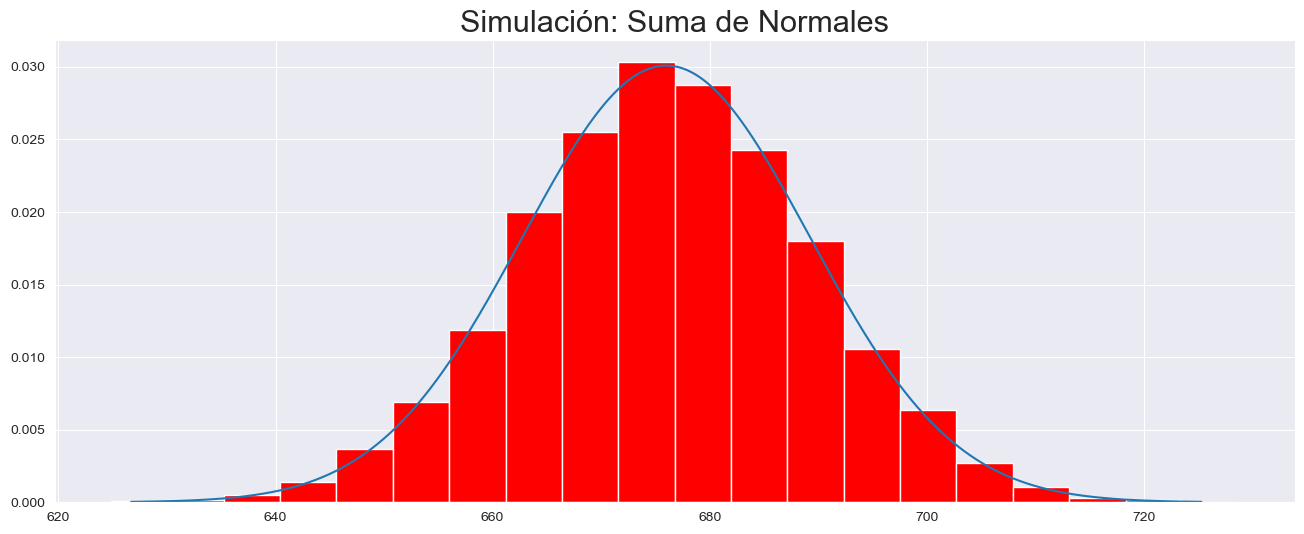

In [37]:
y = np.empty(20000)
##
for i in range(20000):
    x1 = norm.rvs(170, 5.8,1)
    x2 = norm.rvs(178, 6.2,1)
    x3 = norm.rvs(164, 7.2, 1)
    x4 = norm.rvs(164, 7.2, 1)
    y[i] = x1 + x2 + x3 + x4
##
x = np.linspace(norm.ppf(0.0001,676,13.257), norm.ppf(0.9999,676,13.257), 10000)
plt.figure(figsize=(16,6))
plt.plot(x, norm.pdf(x,676,13.257) )
plt.hist(y, density = True, color = "red", bins = 20)
plt.title("Simulación: Suma de Normales", size = 22)
plt.show()

In [38]:
media_teo = 170+178+164+164
std_teo = np.sqrt(5.8**2+6.2**2+7.2**2+7.2**2)
pd.DataFrame({"simulación":[np.mean(y), np.std(y)], "teóricos": [media_teo, std_teo]},
             index = ["media", "desviación estandar"])

,simulación,teóricos
media,676.100477,676.000000
desviación estandar,13.273448,13.257451


#### ***Ejemplo:***

Un ascensor tiene una advertencia de capacidad de 1000 Kg. Al ascensor se suben 12 personas, cuyo peso se distribuyen según una distribución normal con media 90 kg y varianza de 10 kg. ¿Cuál es la probabilidad de que se bloquee el ascensor?

***Solución:***

Definimos la variable $Y$: peso de las 12 personas.

Esto corresponde a la suma de las 12 variables normales $X_i \sim N(90,10)$
La variable está definida como $Y=X_1+X_2+ \dots + X_{12}$.

De acuerdo, a lo anterior
$$Y \sim N(1080, 12 \times 100)= N(1080,120)$$

Calculamos $P(Y>1000)$ 

In [39]:
std = 120**0.5
##
round(norm.sf(1000,1080,std),4)

1.0

Antes de enunciar el teorema del límite central veamos una definición

### ***Función de Probabilidad Conjunta***

Dadas dos variables aletaorias discretas $X$ y $Y$ definidas sobre el mismo espacio de probabilidad de un experimento aleatorio. La función de probabilidad conjunta para cada par $(x,y)$ es

$$P_{XY}(x,y)=P(X=x, Y=y)$$

#### ***Ejemplo:***

- Experimento aleatorio: Tenemos una urna que contiene 4 bolitas rojas, 4 bolitas blancas y se extraen sucesivamente 3 bolitas sin reposición y se registra en orden la extracción, el color de cada bolita extraida.

- Espacio muestral $\Omega=\{bbb,rbb,brb,bbr,rrb,rbr,brr,rrr\}$

- Variables Aleatorias: $X$ y $Y$ definidas por:

   - $X$ : cantidad de bolitas rojas en las dos primeras extracciones.
   
   - $Y$ : cantidad de bolitas rojas en la tercera extracción.



**Solución:** 

- Valores de $X$ --------------> $0,1,2$
- Valores de $Y$ --------------> $0,1$

$P(X=0,Y=0) = P(\{bbb\}) = \frac{4}{8}*\frac{3}{7}*\frac{2}{6}=\frac{1}{14}$

$P(X=0,Y=1)= P(\{bbr\}) = \frac{4}{8}*\frac{3}{7}*\frac{4}{6}=\frac{2}{14}$

$P(X=1,Y=0)$

$P(X=1,Y=1)$

$P(X=2,Y=0)$

$P(X=2,Y=1)$

In [40]:
(4/8)*(3/7)*(4/6)

0.14285714285714285

In [41]:
2/14

0.14285714285714285

### ***Variables Independientes:***

Un conjunto de variables aleatorias $X_1, X_2, X_3, \dots , X_n$ se dice independientes si:

1. $f_{X_1,X_2, \dots , X_n}(x_1, x_2, \dots , x_n) = f_{X_1}(x_1).f_{X_2}(x_2) \dots f_{X_n}(x_n)$, en particular 

2. $P(X_1=x_1, X_2=x_2, \dots X_n =x_n)=P(X=x_1).P(X=x_2). \dots P(X_n=x_n)$. 

Para el caso de 2 y la función de distribución acumuladad:

$P[(X \leq x) \cap (Y \leq y)]=P(X \leq x)P(Y \leq y)$)

## ***Teorema del Límite Central***

Vimos que la suma de variables que se distribuyen de manera normal, también se distribuye normal. Sin embargo, este resultado se puede extender a variables que no se distribuyen necesariamente normal. 

El teorema del límite central, grosso modo garantiza que si sumamos variables aleatorias cualesquiera, la variable suma seguirá una distribución normal bajo algunas condiciones, como por ejemplo, que sea una suma grande de variables, entre otros.

### ***Teorema del Límite Central:***

Sea $X_1,X_2,X_3, \dots , X_n$ un conjunto de variables aleatorias independientes e identicamente distribuidas, cada una de ellas con función de distribución $F$, y supongamos que $E(X_k)=\mu$
y $Var(X_k)=\sigma^2$ para cualquier elemento del conjunto. Si llamamos

$$S_n=\dfrac{X_1+X_2+X_3+ \dots + X_n - n\mu}{\sigma \sqrt{n}}$$
entonces la sucesión de sumas normalizadas converge (norma de funciones) a la variable aleatoria Normal Estándar $Z \sim N(0,1)$, es decir, 

$$S_n \longrightarrow Z$$
Consecuencia importante del teorema: Si consideramos la suma de $n$ variables aleatorias con las condiciones del teorema, es decir, $Y=X_1+X_2+X_3+\dots X_n$, entonces 

$$Y \longrightarrow N(n\mu, n\sigma^2)$$

#### ***Ejemplo 1 (TLC aplicado a variables Bernoulli y Binomiales):***

Si tomamos una sucesión de variables Bernoulli $X_1, X_2, \dots X_n$ tal que cada $X_i \sim Ber_i(p)$ y consideramos  la variable $B_n=X_1+X_2+X_3+ \dots + X_n$, entonces

$$B_n \longrightarrow N(np, np(1-p))$$

Esto se tiene ya que si $X_i \sim Bernoulli(p)$, entonces

- $E[X_i]=p$

- $Var[X_i]=p(1-p)$.

Este resultado es asintótico, es decir, cuando $n$ es muy grande (tiende a infinito).

*Vamos realizar una simulación de la situación anterior.*

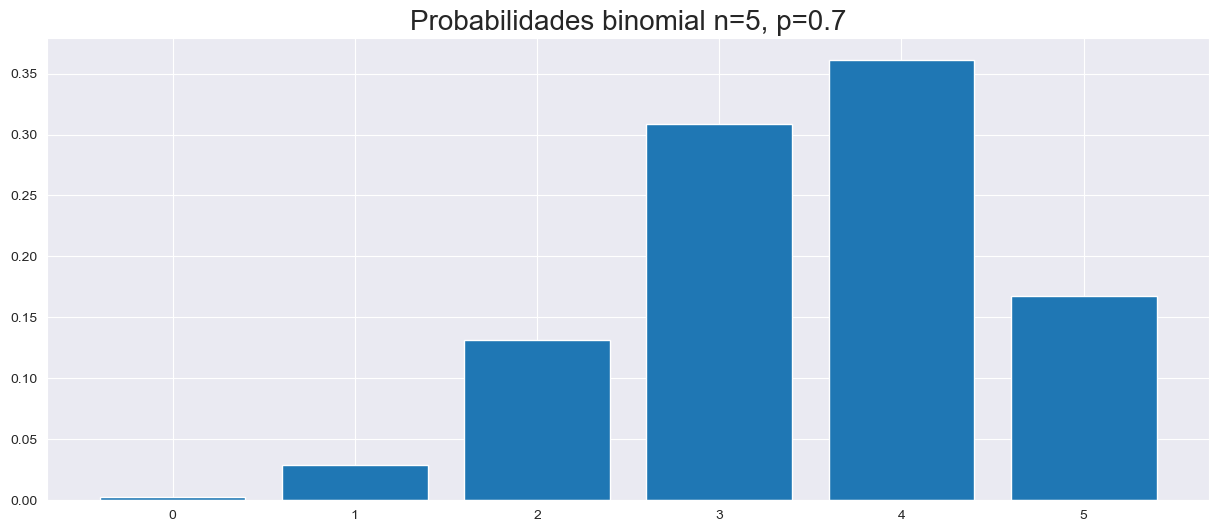

In [42]:
x = binom.rvs(5,0.7, size = 200000)
unicos, conteo = np.unique(x, return_counts=True)
#
plt.figure(figsize=(15,6))
plt.bar(unicos,conteo/len(x))
plt.title("Probabilidades binomial n=5, p=0.7", size = 20)
plt.show()

In [43]:
pd.DataFrame({"Aciertos":[i for i in range(6)], 
              "Probabilidad_simulada": pd.Categorical(x).value_counts()/200000,
              "Probabilidad_teorica": binom.pmf([0,1,2,3,4,5],5,0.7) })

,Aciertos,Probabilidad_simulada,Probabilidad_teorica
0,0,0.002435,0.00243
1,1,0.028635,0.02835
2,2,0.131710,0.13230
3,3,0.308405,0.30870
4,4,0.360900,0.36015
5,5,0.167915,0.16807


In [44]:
## Valor esperado o media de la Binomial B(5,0.7)
5*0.7

3.5

In [45]:
binom.rvs(5,0.7, size = 200000)

array([3, 3, 2, ..., 4, 3, 4])

In [46]:
sum(binom.rvs(5,0.7,size=1000))

3510

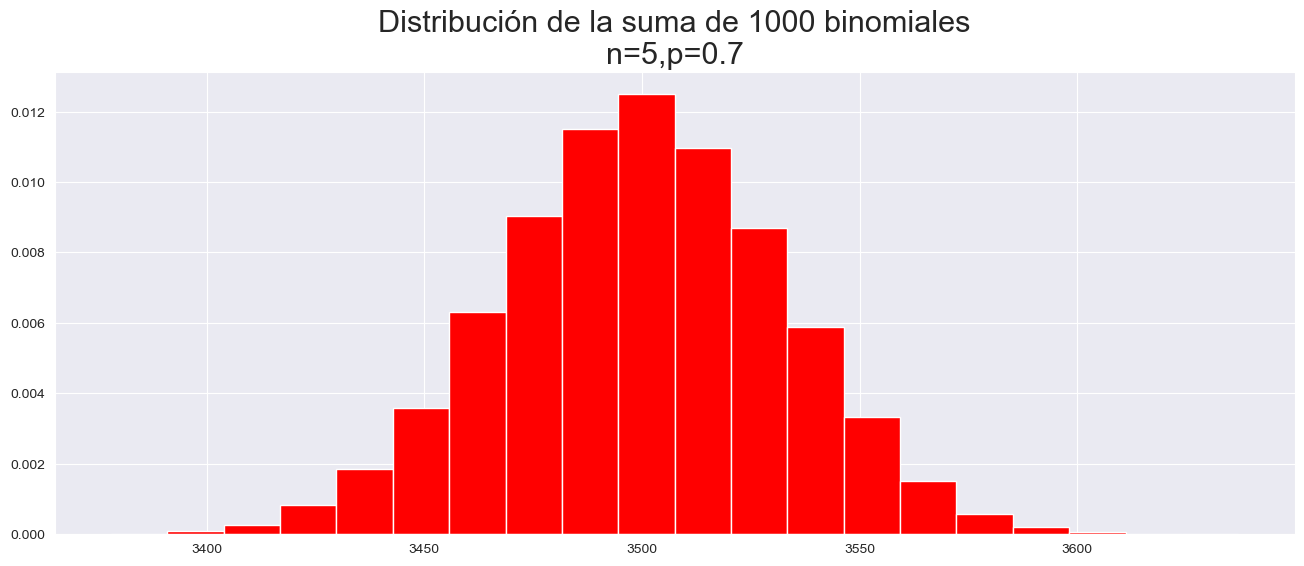

In [47]:
y = np.empty(20000)
for i in range(20000):
    y[i] = sum(binom.rvs(5,0.7,size=1000))
##
plt.figure(figsize=(16,6))
plt.hist(y, density=True, color = "red", bins = 20)
plt.title("Distribución de la suma de 1000 binomiales\nn=5,p=0.7", size = 22)
plt.show()

In [48]:
p = 0.7                               ## Probalidad de éxito.
n = 5                                 ## Número de ensayos de la binomial.
ex = n*p                              ## Valor esperado de la Binomial B(5,0.7)
var = n*p*(1-p)                       ## Varianza Binomial B(5,0.7)
###
N = 1000                              ## Número variables aleatorias a sumar
print("La media teórica de la suma debe ser de:",N*ex)
print("La varianza teórica de la suma debe ser de:",N*var)

La media teórica de la suma debe ser de: 3500.0
La varianza teórica de la suma debe ser de: 1050.0000000000002


In [49]:
print("La media de la suma de las 1000 Binomiales simuladas es: ",np.mean(y))
print("La varianza de la suma de las 1000 Binomiales  simuladas es:",np.var(y))

La media de la suma de las 1000 Binomiales simuladas es:  3499.8097
La varianza de la suma de las 1000 Binomiales  simuladas es: 1045.75058591
